##  <u> ***Data Modelling***  </u>

In [ ]:
%run 3_EDA.ipynb

### <u>*Calssifications Modelling for gender as a Target Features*</u>

* #### *Import Needed Libraries :*

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import (
    mean_absolute_error,mean_squared_error, r2_score,accuracy_score,roc_auc_score,auc,roc_curve,precision_score,
    recall_score,f1_score
    )

from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBRegressor,XGBRFRegressor,XGBClassifier,XGBRFClassifier
import warnings
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier
)


### *A.* <u>*gender as a Target Feature :*</u>

#### *A.1*<br> <u>*Basic Models Comparison :*</u>

##### *A.1.1*<br> <u>*Models :*</u>

In [39]:
models = {
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(),
                "XGBRegressor": XGBClassifier(),
                "CatBoosting Regressor": CatBoostClassifier(verbose=False),
                "AdaBoost Regressor": AdaBoostClassifier(),
            }

##### *A.1.2*<br> <u>*Prepare Date :*</u>

In [257]:
LabelEncoder_cat = LabelEncoder()
df_gender=df.copy()
df_gender["gender"]=LabelEncoder_cat.fit_transform(df_gender["gender"])
x_gender=df_gender.drop("gender",axis=1)
y_gender= df_gender["gender"]


xtrain_full,xtest_full, ytrain, ytest = train_test_split(x_gender, y_gender, train_size=0.8, test_size=0.2,random_state=0)

numerical_cols = [col for col in xtrain_full.columns if xtrain_full[col].dtype in ['int64', 'float64']]
categorical_cols =[col for col in xtrain_full.columns if  xtrain_full[col].dtype == "object"]

my_cols = categorical_cols + numerical_cols
xtrain = xtrain_full[my_cols].copy()
xtest = xtest_full[my_cols].copy()

numerical_transformer = Pipeline(steps=[
    ("scaler",StandardScaler())
    ])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ("scaler",StandardScaler(with_mean=False))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

##### *A.1.3*<br> <u>*Apply Models :*</u>

In [ ]:
def Cat_evaluate_model(true, predicted):
    AccuracyScore = accuracy_score(true, predicted)
    
    return AccuracyScore

###################################################

model_list = []
accurecy_list =[]
#mae_list=[]
#aucScore_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', model) 
                             ])
    model.fit(xtrain, ytrain) 

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    model_train_AccuracyScore = Cat_evaluate_model(ytrain, y_train_pred)
    model_test_AccuracyScore = Cat_evaluate_model(ytest, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy Score: {:.4f}".format(model_train_AccuracyScore))
    


    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy Score: {:.4f}".format(model_test_AccuracyScore))
   
 
    accurecy_list.append(model_test_AccuracyScore)
    #aucScore_list.append(model_test_aucScore)
    #mae_list.append(model_test_mae)
    
    print('='*35)
    print('\n')



##### *A.1.4*<br> <u>*Best Model :*</u>

In [259]:
pd.DataFrame(list(zip(model_list,accurecy_list)), 
             columns=['Model Name', 'accurecy']).sort_values(by=["accurecy"],ascending=True)

,Model Name,accurecy
1,Decision Tree,0.626584
0,Random Forest,0.629679
5,AdaBoost Regressor,0.631152
3,XGBRegressor,0.633584
2,Gradient Boosting,0.635721
4,CatBoosting Regressor,0.635794


##### *A.1.5*<br> <u>*Apply Best Model :*</u>

In [260]:
model =my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', DecisionTreeClassifier())# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
model.fit(xtrain, ytrain) 

print("Accuracy of DT_Model: ",
      accuracy_score(ytest, model.predict(xtest)))
# print other performance metrics
print("Precision of DT_Model: ", 
      precision_score(ytest, model.predict(xtest), average='weighted'))
print("Recall of DT_Model: ",
      recall_score(ytest, model.predict(xtest), average='weighted'))
print("F1-Score of DT_Model: ",
      f1_score(ytest, model.predict(xtest), average='weighted'))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['clm', 'numclaims',
                                                   'veh_body', 'veh_age',
                                                   'area', 'agecat'])])),
                ('melbourne_model', DecisionTreeClassifier())])

In [ ]:
#Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives.
#It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

#Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives.
#Recall is the same as sensitivity.

# True Positive Rate = True Positives / (True Positives + False Negatives)  sensitivity==Recall
# False Positive Rate = False Positives / (False Positives + True Negatives) Specificity where : False Positive Rate = (1 - Specificity)
# Positive Predictive Power = True Positives / (True Positives + False Positives) Precision

##### *A.1.6*<br> <u>*Visualize Best Model :*</u>

In [262]:
from sklearn.metrics import (
    precision_recall_curve,
    classification_report,RocCurveDisplay,
    confusion_matrix,f1_score,ConfusionMatrixDisplay
    )
import pandas as pd
import seaborn as sns

In [263]:
from sklearn.utils.multiclass import unique_labels
import pandas as pd
unique_labels(ytest)
labels=unique_labels(ytest)
col_names=[f"predicted{label}"for label in labels ]
index_names=[f"Actual{label}"for label in labels ]
pd.DataFrame(confusion_matrix(ytest, model.predict(xtest)),columns=col_names,index=index_names)

,predicted0,predicted1
Actual0,6279,1404
Actual1,3666,2223


<Axes: >

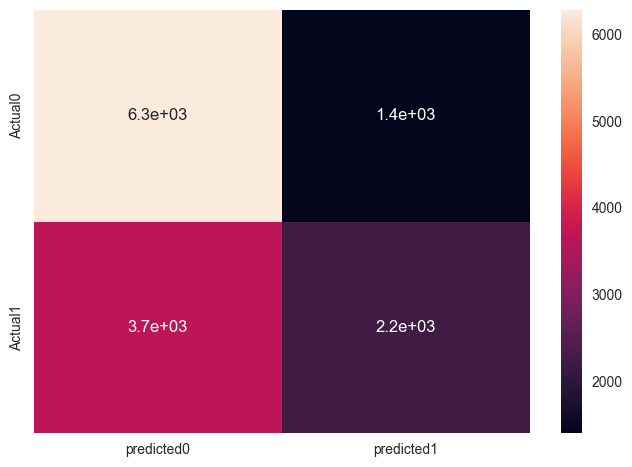

In [264]:

sns.heatmap(data=pd.DataFrame(confusion_matrix(ytest, model.predict(xtest)),columns=col_names,index=index_names),annot=True)

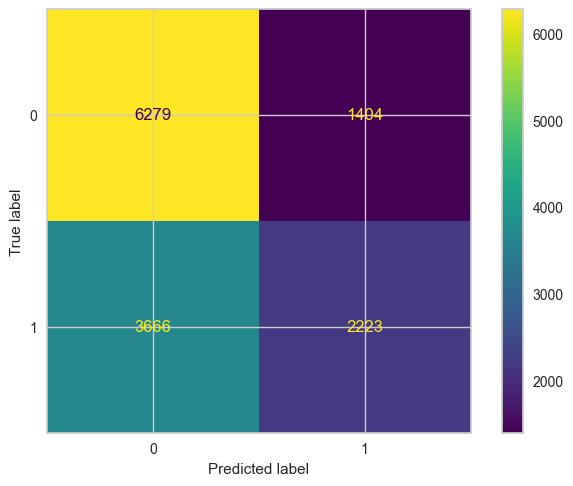

In [265]:
ConfusionMatrixDisplay(confusion_matrix(ytest, model.predict(xtest))).plot();

In [267]:
print(classification_report(ytest, model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      7683
           1       0.61      0.38      0.47      5889

    accuracy                           0.63     13572
   macro avg       0.62      0.60      0.59     13572
weighted avg       0.62      0.63      0.61     13572



In [268]:
from yellowbrick.classifier import ClassificationReport
classes = ["Male", "Femle"]
visualizer = ClassificationReport(DecisionTreeClassifier(), classes=classes, support=True)



AttributeError: 'Pipeline' object has no attribute 'show'

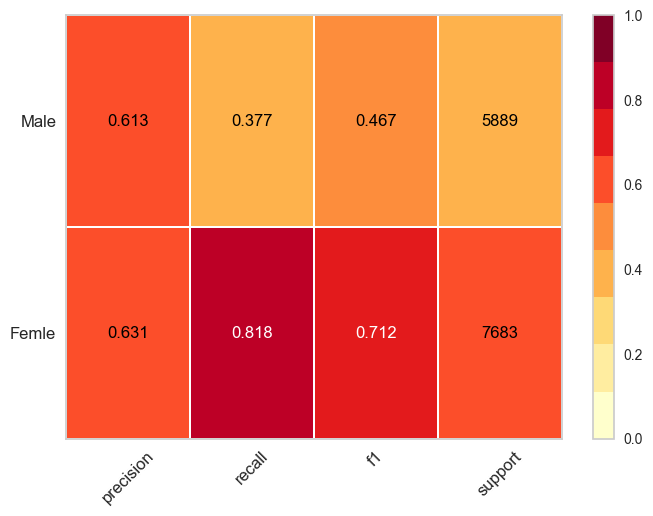

In [269]:
visualizer_Plot= Pipeline(steps=[('preprocessor', preprocessor),
                              ('melbourne_model', visualizer)# or ('melbourne_model', RandomForestRegressor(random_state=0,n_estimators=50)) 
                             ])
visualizer_Plot.fit(xtrain, ytrain)        # Fit the visualizer and the model
visualizer_Plot.score(xtest, ytest)        # Evaluate the model on the test data
visualizer_Plot.show()

In [270]:
fpr, tpr, thresholds = roc_curve(ytest, model.predict(xtest))  #false positive rate,true positive rate
fpr, tpr, thresholds

(array([0.        , 0.18274112, 1.        ]),
 array([0.        , 0.37748344, 1.        ]),
 array([inf,  1.,  0.]))

In [271]:
auc = roc_auc_score(ytest, model.predict(xtest))
print('AUC: %.3f' % auc)

AUC: 0.597


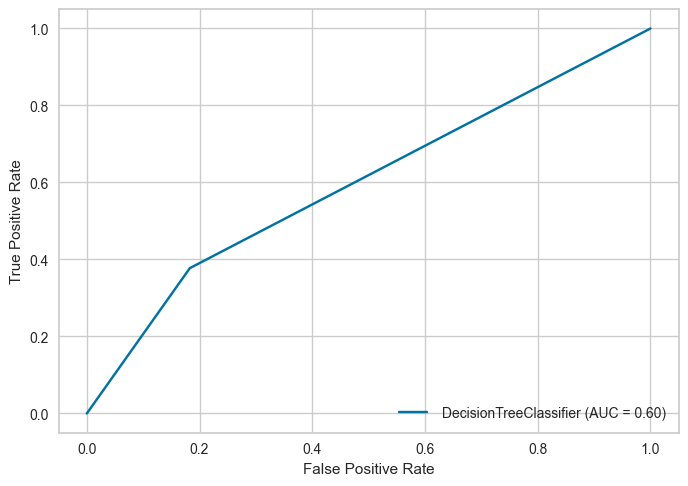

In [272]:
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name=' DecisionTreeClassifier').plot()

In [325]:
import plotclassification ,plotly
import matplotlib.pyplot as plt


# initialize parameters value
plot=plotclassification.plot(y=ytest,
	         y_predict_proba=model.predict_proba(xtest),
	         class_name=["Female","Male"])


In [326]:
plot.class_name
['Femal','male']

['Femal', 'male']

In [340]:
#  confusion matrix plot
plot.plot_confusion_matrix()

In [322]:

plot.plot_classification_report()


In [304]:
# precision recall curve plot
plot.plot_precision_recall_curve()



In [305]:

plot.plot_roc()

# predicted probability histogram plot
#plot_probability_histogram()